# Feature Reduction

## 1) Principal Component Analysis

In [16]:
# importando librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

**Cargando la base**

In [12]:
# importando la base de datos
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Transformando el dataframe a array
X = df.values

**Estandarizando la base**

In [17]:
# Crando el objeto Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Se calcula media y stand desv
scaler.fit(X)

# Se transforman los valores
X_scaled = scaler.transform(X)

**Primeros ejercicios de PCA**

In [47]:
# Establecer a cuántas dimensiones se va a buscar reducir
# OJO 1: Si no se establece el número de componente, te pone de default lo original
# OJO 2: Si se pone algo entre 0 y 1, te regresa el número de componentes que explica x% de la varianza
from sklearn.decomposition import PCA

# Prueba de número original para ver qué tan bien se captura la varianza
pca = PCA(n_components=30, random_state=123)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [48]:
print('Considerando dicho número de componentes, la varianza explicada represena el ',
     round(sum(pca.explained_variance_ratio_ * 100),2))

Considerando dicho número de componentes, la varianza explicada represena el  100.0


In [49]:
pd.DataFrame(X_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563,-0.133768,0.345565,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297,0.247565,-0.114133,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975,0.392626,-0.204532,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875,0.026748,-0.464734,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714,-0.461436,0.065495,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


**El 85% de la varianza se encuentra en los primeros 5 PCA**

In [77]:
db_1 = pd.DataFrame((pca.explained_variance_ratio_*100).round(2), columns=['%_var'])
db_1['acum_sum'] = db_1['%_var'].round(2).cumsum(axis=0)
db_1 = db_1.reset_index()
db_1.rename(columns = {'index':'#_component'}, inplace = True)
db_1.head(5)

,#_component,%_var,acum_sum
0,0,44.27,44.27
1,1,18.97,63.24
2,2,9.39,72.63
3,3,6.60,79.23
4,4,5.50,84.73


**Visualizando el ejercicio**

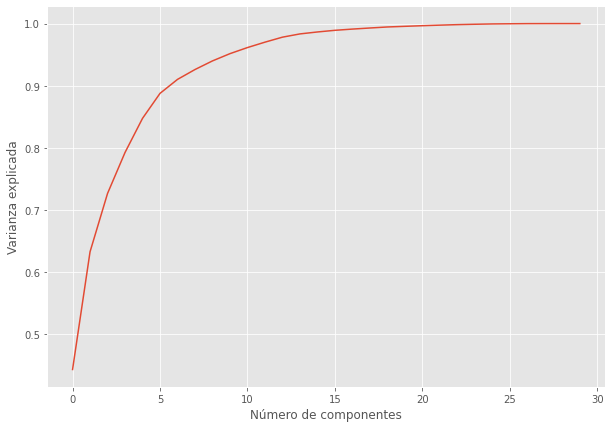

In [83]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')

plt.show()

**Reducirlo a 2 dimensiones**

In [78]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(X_scaled)
X_pca_2 = pca.transform(X_scaled)

**Visualización - Opción #1**

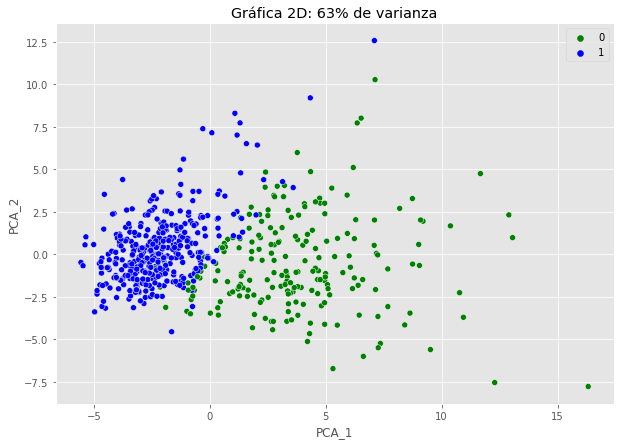

In [89]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=cancer.target,
                palette=['green','blue'])

plt.title("Gráfica 2D: 63% de varianza")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")

plt.show()

**Visualización - Opción #2**

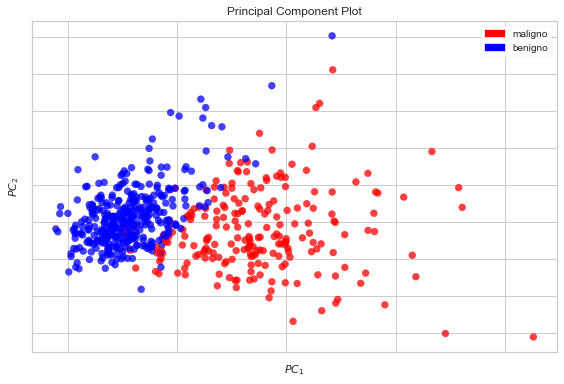

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [95]:
from yellowbrick.features import PCA

vis = PCA(scale=True, projection=2, classes=['maligno','benigno'], 
         random_state=123, colors=['red','blue'])

vis.fit_transform(X, cancer.target)
vis.show()

## 2) Factor Analysis

In [110]:
#!pip install factor_analyzer

In [111]:
# importando librerías
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
path="/Users/jpolanco/Desktop/Jorge/ITESM/Ejercicios/Clases Tec/Final/Bases_Clases/"

In [115]:
df= pd.read_csv(path+"bfi.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [116]:
# Eliminando las últimas variables
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)

In [117]:
# Quitando renglones con missing values
df.dropna(inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

**¿Puedo usar Factor Analysis con mis datos?**:

**Bartlett's test**: Verifica si las variables observadas se interrelacionan o no utilizando la matriz de correlación observada contra la matriz de identidad. Si rechazamos H0, se puede emplear un FA.

In [120]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18184.306307821134, 0.0)

**Kaiser-Meyer-Olkin (KMO) test**: KMO estima la proporción de varianza entre todas las variables observadas. Los valores de KMO oscilan entre 0 y 1. Un valor de KMO mayor a 0,6 se considera adecuado para FA.

In [122]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.848326702719236

**¿Cuántos Factores se deben de considerar?**: Hasta donde los Eigenvalues marquen más de 1, en este caso, serían 6 factores.

In [126]:
# Crear objeto para correr el FA
fa = FactorAnalyzer()
fa.fit(df)

# Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

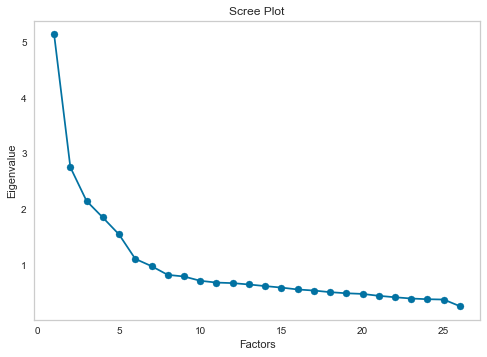

In [127]:
# Visualizando
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

**Realizando el FA**:

In [180]:
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [181]:
# Creando los loadings
fa_1 = pd.DataFrame(fa.loadings_).reset_index()
fa_1.columns = ['Variables', 'Factor_1', 'Factor_2', 'Factor_3', 'Factor_4',
              'Factor_5', 'Factor_6']
fa_1

,Variables,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,0,-0.022903,-0.032472,0.033169,-0.038093,0.003795,0.103748
1,1,0.099396,0.060474,0.026694,-0.530785,-0.120309,0.163638
2,2,0.031767,0.259875,0.140226,0.646569,0.055770,-0.097050
3,3,-0.005256,0.408849,0.109534,0.587004,0.016184,0.039149
4,4,-0.079266,0.255342,0.229308,0.391760,-0.136293,0.033401
5,5,-0.143645,0.491049,0.085649,0.451090,0.009111,0.105888
6,6,0.005623,0.123647,0.540150,0.004221,0.183458,0.138798
7,7,0.084358,0.106505,0.652496,0.056538,0.079203,0.208580
8,8,-0.033946,0.049796,0.545877,0.100286,-0.012372,0.054480
9,9,0.231617,0.008989,-0.672785,-0.089980,-0.153451,0.226977


In [182]:
fa_1[['Variables','Factor_1']].sort_values(by='Factor_1', ascending = False)

,Variables,Factor_1
16,16,0.790967
17,17,0.777085
18,18,0.728187
19,19,0.597786
20,20,0.534791
10,10,0.293402
12,12,0.263189
9,9,0.231617
24,24,0.228721
22,22,0.161465


**SS Loadings, Proportion Var, Cumulative Var**:

In [166]:
# 43% de la varianza acumulada se encuentra en los 6 factores
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')
fa.fit(df)
fa.get_factor_variance()

(array([2.76721163, 2.72814016, 2.07554606, 1.6108362 , 1.46335443,
        0.62155904]),
 array([0.10643122, 0.10492847, 0.07982869, 0.06195524, 0.05628286,
        0.02390612]),
 array([0.10643122, 0.21135968, 0.29118838, 0.35314362, 0.40942648,
        0.4333326 ]))